<a href="https://colab.research.google.com/github/AWTT237/Business-intelligence-analysis/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Task 1: Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)



In [5]:
# Task 2: Inspect the data
#  Display the first 5 rows of the dataset
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
# TODO: Display the last 5 rows of the dataset
df.tail(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [7]:
#  Display the data types of each column
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
Siblings/Spouses Aboard,int64
Parents/Children Aboard,int64
Fare,float64


In [8]:
# Display summary statistics of the numerical columns
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [9]:
# Task 3: Clean and preprocess the data

#  Create a new categorical feature 'PclassCategory' from 'Pclass'
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

In [11]:
# TODO: Create a new categorical feature 'CabinCategory' from 'Cabin'
df['CabinCategory'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'Unknown')

KeyError: 'Cabin'

In [13]:
# check columns
print(df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'PclassCategory'],
      dtype='object')


the column name Cabin does not exist in our dataset so impssiple to create a 'cabincategory' column

In [16]:
# Handle missing values in the 'Age' column (use mean age)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
882,27.0
883,19.0
884,7.0
885,26.0


In [19]:
# Create a 'Family' feature by combining 'SibSp' and 'Parch'
df['Family'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
df['Family']

,Family
0,1
1,1
2,0
3,1
4,0
...,...
882,0
883,0
884,3
885,0


the abbreviation of sibsp='Siblings/Spouses Aboard'

the abbreviation of parch = 'Parents/Children Aboard'



In [21]:
# Task 4: Identify specific data points

# Find passengers with the highest fare
highest_fare_passengers = df[df['Fare'] == df['Fare'].max()]

# Display the result
print(highest_fare_passengers)



     Survived  Pclass                               Name     Sex   Age  \
257         1       1                    Miss. Anna Ward  female  35.0   
676         1       1  Mr. Thomas Drake Martinez Cardeza    male  36.0   
733         1       1              Mr. Gustave J Lesurer    male  35.0   

     Siblings/Spouses Aboard  Parents/Children Aboard      Fare  \
257                        0                        0  512.3292   
676                        0                        1  512.3292   
733                        0                        0  512.3292   

    PclassCategory  Family  
257          First       0  
676          First       1  
733          First       0  


In [22]:
# Find passengers with the largest family size

largest_family_passengers = df[df['Family'] == df['Family'].max()]

# Display the result
print(largest_family_passengers)


     Survived  Pclass                         Name     Sex   Age  \
158         0       3    Master. Thomas Henry Sage    male   5.0   
179         0       3  Miss. Constance Gladys Sage  female   8.0   
200         0       3           Mr. Frederick Sage    male  17.0   
322         0       3      Mr. George John Jr Sage    male  20.0   
788         0       3       Miss. Stella Anna Sage  female  21.0   
842         0       3      Mr. Douglas Bullen Sage    male  18.0   
859         0       3     Miss. Dorothy Edith Sage  female  14.0   

     Siblings/Spouses Aboard  Parents/Children Aboard   Fare PclassCategory  \
158                        8                        2  69.55          Third   
179                        8                        2  69.55          Third   
200                        8                        2  69.55          Third   
322                        8                        2  69.55          Third   
788                        8                        2  69.55

In [23]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

#  Create a Pandas Series of passenger names
names_series = pd.Series(df['Name'])

# Display the Series
print(names_series)

0                                 Mr. Owen Harris Braund
1      Mrs. John Bradley (Florence Briggs Thayer) Cum...
2                                  Miss. Laina Heikkinen
3            Mrs. Jacques Heath (Lily May Peel) Futrelle
4                                Mr. William Henry Allen
                             ...                        
882                                 Rev. Juozas Montvila
883                          Miss. Margaret Edith Graham
884                       Miss. Catherine Helen Johnston
885                                 Mr. Karl Howell Behr
886                                   Mr. Patrick Dooley
Name: Name, Length: 887, dtype: object


In [24]:
# TODO: Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']]

# Display the DataFrame
print(names_ages_df)

                                                  Name   Age
0                               Mr. Owen Harris Braund  22.0
1    Mrs. John Bradley (Florence Briggs Thayer) Cum...  38.0
2                                Miss. Laina Heikkinen  26.0
3          Mrs. Jacques Heath (Lily May Peel) Futrelle  35.0
4                              Mr. William Henry Allen  35.0
..                                                 ...   ...
882                               Rev. Juozas Montvila  27.0
883                        Miss. Margaret Edith Graham  19.0
884                     Miss. Catherine Helen Johnston   7.0
885                               Mr. Karl Howell Behr  26.0
886                                 Mr. Patrick Dooley  32.0

[887 rows x 2 columns]


In [31]:
# Slice the DataFrame to show only passengers older than 50
older_passengers = df[df['Age'] > 50]

# Display the result
print(older_passengers)

     Survived  Pclass                                               Name  Sex  \
6           0       1                             Mr. Timothy J McCarthy    0   
11          1       1                            Miss. Elizabeth Bonnell    1   
15          1       2                     Mrs. (Mary D Kingcome) Hewlett    1   
33          0       2                               Mr. Edward H Wheadon    0   
53          0       1                      Mr. Engelhart Cornelius Ostby    0   
..        ...     ...                                                ...  ...   
816         1       1  Mrs. Charles Melville (Clara Jennings Gregg) Hays    1   
825         1       1           Mrs. George Nelson (Martha Evelyn) Stone    1   
847         0       3                                 Mr. Johan Svensson    0   
853         1       1                               Mr. Peter Denis Daly    0   
875         1       1       Mrs. Thomas Jr (Lily Alexenia Wilson) Potter    1   

      Age  Siblings/Spouses

In [32]:
# Task 6: Introduce multi-indexing

# Group by 'Sex' and 'Pclass' and compute the mean for numeric columns
multi_index_df = df.groupby(['Sex', 'Pclass']).mean(numeric_only=True)

# Display the multi-indexed DataFrame
print(multi_index_df)


            Survived        Age  Siblings/Spouses Aboard  \
Sex Pclass                                                 
0   1       0.368852  41.511639                 0.311475   
    2       0.157407  30.493796                 0.342593   
    3       0.137026  26.470612                 0.504373   
1   1       0.968085  35.255319                 0.553191   
    2       0.921053  28.980263                 0.486842   
    3       0.500000  22.135417                 0.895833   

            Parents/Children Aboard        Fare    Family  
Sex Pclass                                                 
0   1                      0.278689   67.226127  0.590164  
    2                      0.222222   19.741782  0.564815  
    3                      0.227405   12.695466  0.731778  
1   1                      0.457447  106.125798  1.010638  
    2                      0.605263   21.970121  1.092105  
    3                      0.798611   16.118810  1.694444  


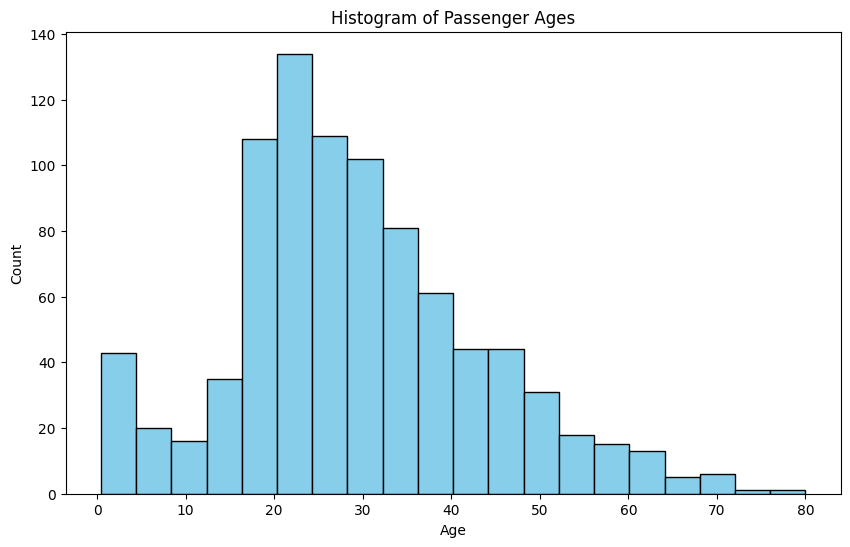

In [34]:
# Task 7: Visualization

# Create a histogram of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-1065091287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


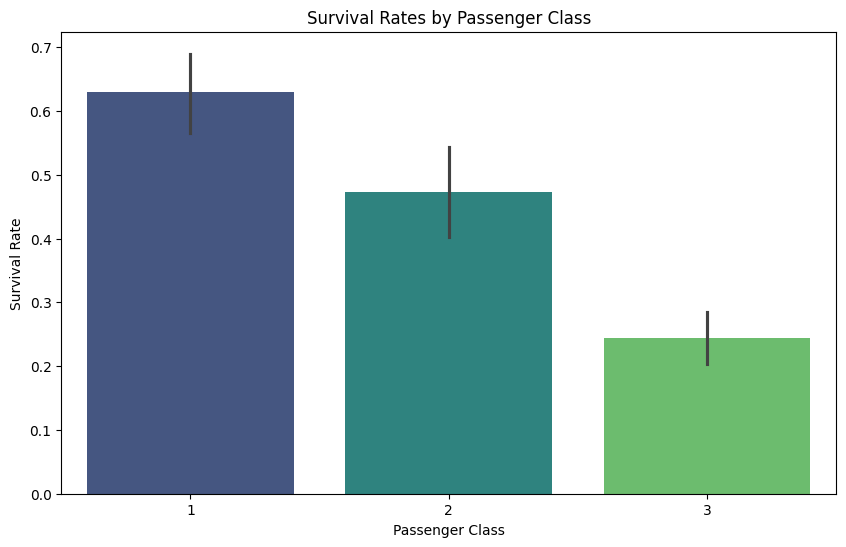

In [36]:

# Create a bar plot of survival rates by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()



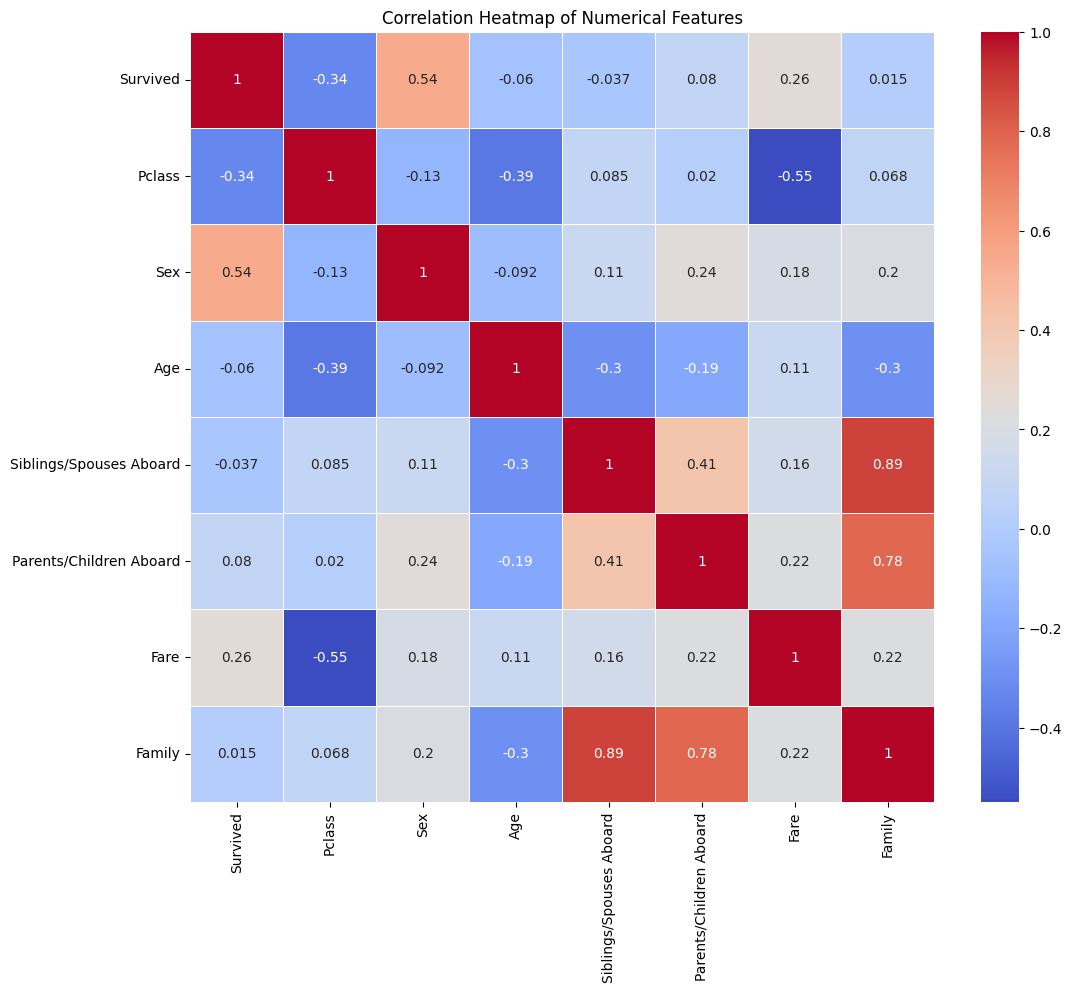

In [38]:

# Optional: drop non-numeric columns to avoid issues
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a heatmap of correlation between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


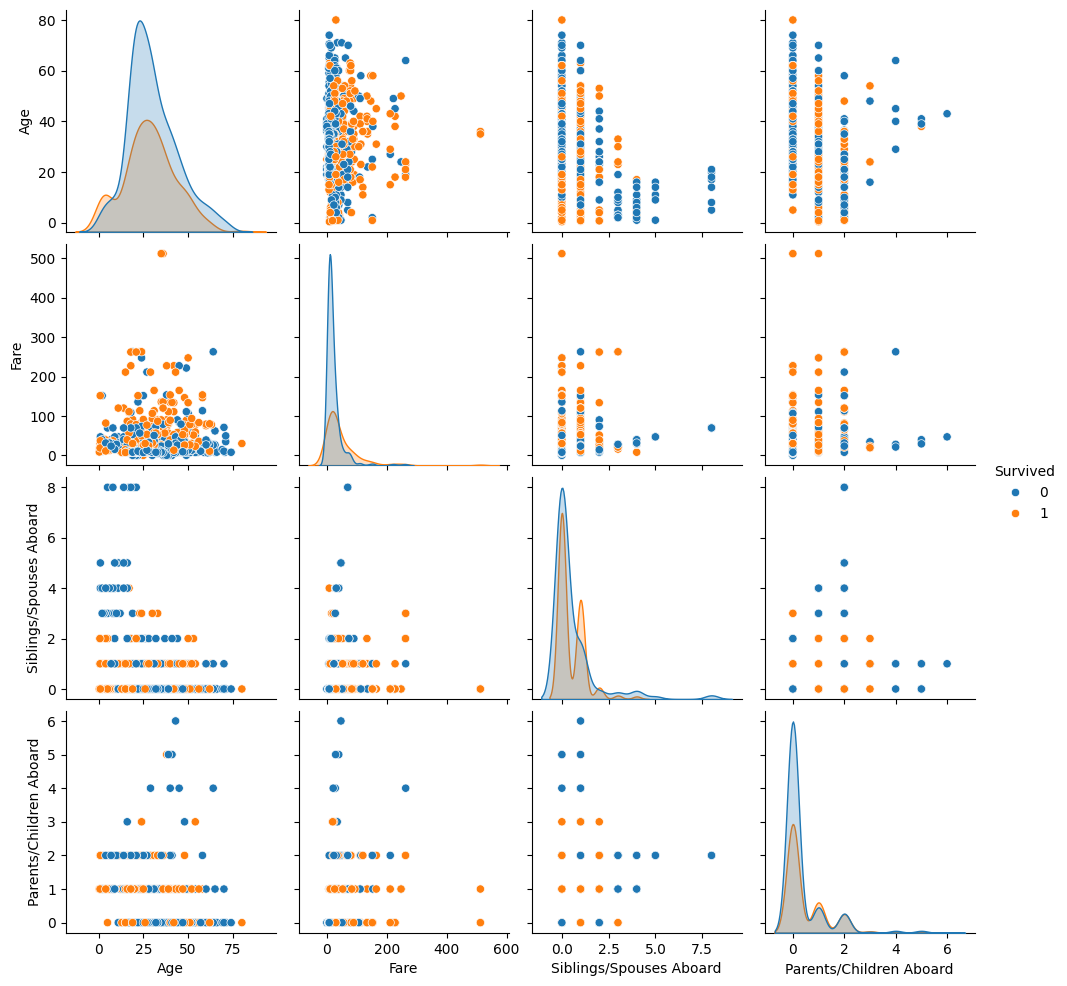

In [39]:
# Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'])
plt.show()



In [43]:
# Task 8: Analyze survival rates

# Calculate and display survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)


Sex
0    0.190227
1    0.742038
Name: Survived, dtype: float64


In [44]:
# Calculate and display survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


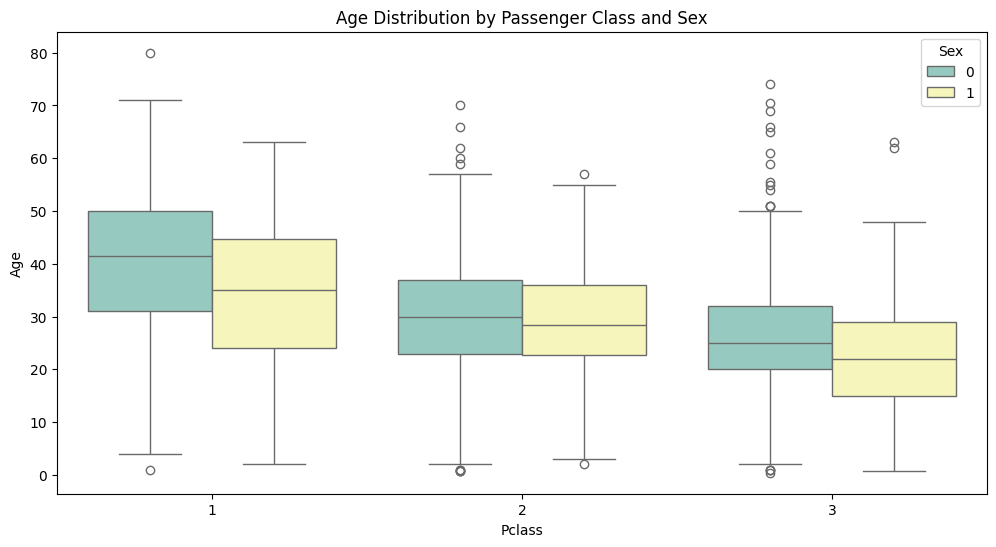

In [45]:

# Task 9: Analyze age distribution

# Create a box plot of age distribution by passenger class and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df, palette='Set3')
plt.title('Age Distribution by Passenger Class and Sex')
plt.show()


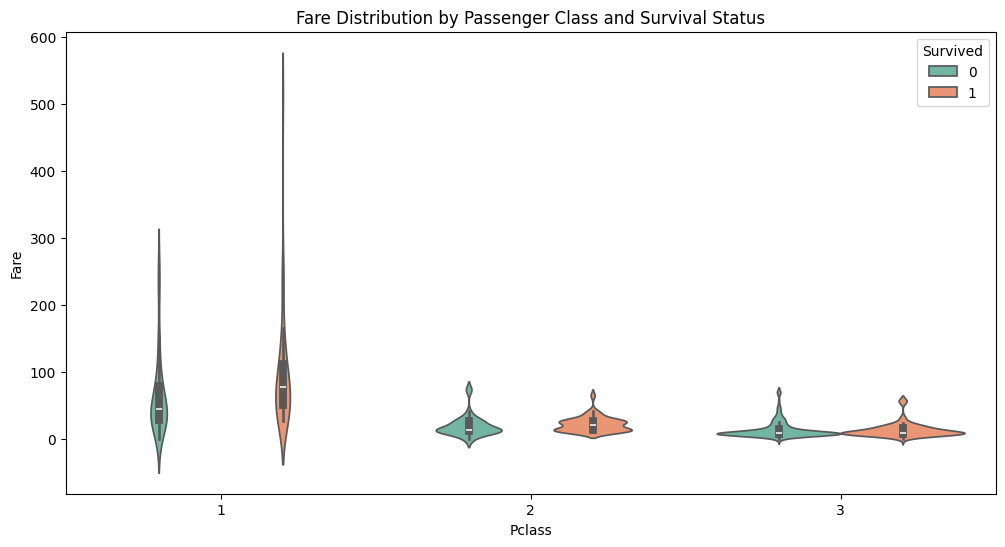

EDA tasks completed.


In [46]:
# Task 10: Analyze fare distribution

#  Create a violin plot of fare distribution by passenger class and survival status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set2')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.show()

print("EDA tasks completed.")